## <p style="text-align: center;">MIS 284N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Project 2 - Machine Learning using Scikit and AWS</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Friday, October 4 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

This project is about giving exposure about Machine learning, its usage, Cloud services and why they are helpful in analyzing Big Data.

In this Project, we are trying to analyze the crime data. This data is taken from <a href=https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data> here </a>. You have to download data from here, it should be around 1.6 GB in size. You have to predict type of crime that can happen given the features.

You have to complete all the four tasks and report your observations for each if any.

Note: Please post clarification questions on Piazza. 

# Task 1 - Read the data and filter the data you need

This is open ended, you can use any features you want and drop any one of them. The 'Primary Type' is our target variable which we will be predicting for.
This task is split into multiple parts:


1.   Print the Histogram of variable 'Primary Type'. The x-axis should be each primary type, and the y-axis will the the count of each Primary type.
2. Sort the histogram in decreasing order. This will help you to understand which Primary Type of crime occured more than the rest. 
3. Now, 'K' is the total number of classes in Primary Type. Experiment with K=2,3,4,5 as the most popular Primary Type data to be used and predicted. 
4.  Given a percentage 'P', find the most number of 'K' your local system can handle during data loading, training and prediction. Report that 'K'. Ideally, you should test for a 'P' value of 60%. Meaning, you should have used 60% of the total data you are given. If you are given 1000 samples, you should use at least 600 samples and split that into train and test. 
5.  For each K=2,3,4,5 and percentage 'P', you should have trained a model and report the accuracy. (Refer to other tasks)
Hint: Split your data for each k=2,3,4,5 and P values and run individual models on them. 
Split the data into training and testing in the ratio of 80:20.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('crimes16-19.csv')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11834500,JC440683,09/19/2019 11:55:00 PM,019XX W 79TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,False,False,...,-87.672467,"(41.750239984, -87.672467266)",6.0,21554.0,70.0,573.0,31.0,59.0,20.0,231.0
1,11837450,JC443701,09/19/2019 11:55:00 PM,035XX S RHODES AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,-87.614452,"(41.829651528, -87.614451899)",1.0,4301.0,1.0,561.0,10.0,36.0,24.0,101.0
2,11834543,JC440668,09/19/2019 11:53:00 PM,011XX W 104TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,True,False,...,-87.650877,"(41.705024656, -87.650877274)",45.0,22212.0,72.0,595.0,22.0,13.0,9.0,253.0
3,11834471,JC440670,09/19/2019 11:50:00 PM,002XX W 63RD ST,0484,BATTERY,PRO EMP HANDS NO/MIN INJURY,CTA PLATFORM,False,False,...,-87.630937,"(41.779975054, -87.630937377)",53.0,21559.0,66.0,435.0,4.0,11.0,17.0,201.0
4,11835458,JC441818,09/19/2019 11:50:00 PM,048XX W JACKSON BLVD,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,RESIDENTIAL YARD (FRONT/BACK),False,False,...,-87.746417,"(41.876768705, -87.746417287)",11.0,22216.0,26.0,69.0,23.0,32.0,25.0,137.0


In [7]:
df_type=df[['ID','Primary Type']]
df_count=df_type.groupby(['Primary Type'], as_index=False).count()
df_count=df_count.sort_values(['ID'])
df_count.head()

,Primary Type,ID
19,NON-CRIMINAL (SUBJECT SPECIFIED),5
22,OTHER NARCOTIC VIOLATION,17
25,PUBLIC INDECENCY,31
11,HUMAN TRAFFICKING,31
18,NON-CRIMINAL,88


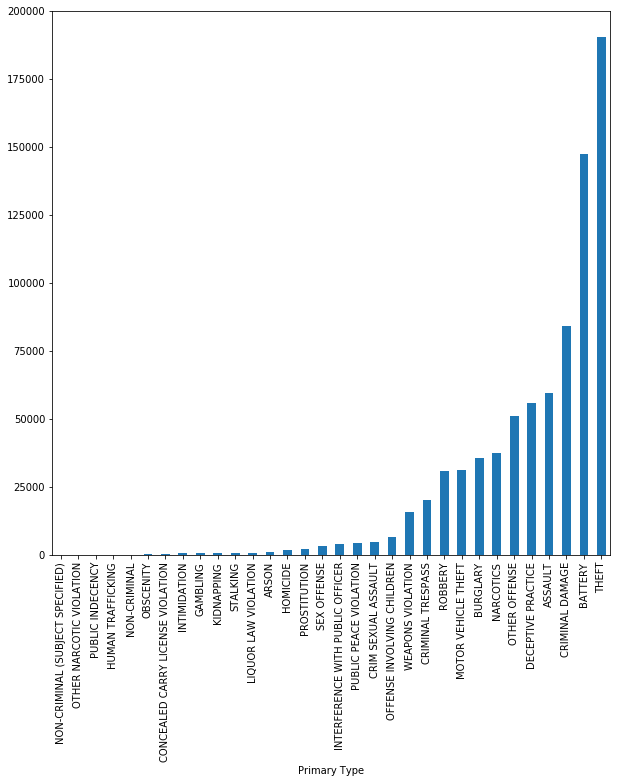

In [13]:
df_count.plot(kind='bar',x='Primary Type',y='ID', figsize=(10,10),legend=False)
plt.show()

# Task 2 - Convert the features in a form that can be given as input to scikit library/functions

Here you have to search a little bit. The data that we are using has data other than numerical values. The model takes values as numerical or categorical data. You need to convert the input data to either one of these forms. 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791139 entries, 0 to 791138
Data columns (total 31 columns):
ID                            791139 non-null int64
Case Number                   791139 non-null object
Date                          791139 non-null object
Block                         791139 non-null object
IUCR                          791139 non-null object
Primary Type                  791139 non-null object
Description                   791139 non-null object
Location Description          788135 non-null object
Arrest                        791139 non-null bool
Domestic                      791139 non-null bool
Beat                          791139 non-null int64
District                      791138 non-null float64
Ward                          791126 non-null float64
Community Area                791136 non-null float64
FBI Code                      791139 non-null object
X Coordinate                  782222 non-null float64
Y Coordinate                  782222 non-nu

In [50]:
df1=df.copy()

In [49]:

df1.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,LocationCategory
0,11834500,JC440683,09/19/2019 11:55:00 PM,019XX W 79TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,False,False,...,"(41.750239984, -87.672467266)",6.0,21554.0,70.0,573.0,31.0,59.0,20.0,231.0,113
1,11837450,JC443701,09/19/2019 11:55:00 PM,035XX S RHODES AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,"(41.829651528, -87.614451899)",1.0,4301.0,1.0,561.0,10.0,36.0,24.0,101.0,-1
2,11834543,JC440668,09/19/2019 11:53:00 PM,011XX W 104TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,True,False,...,"(41.705024656, -87.650877274)",45.0,22212.0,72.0,595.0,22.0,13.0,9.0,253.0,127
3,11834471,JC440670,09/19/2019 11:50:00 PM,002XX W 63RD ST,0484,BATTERY,PRO EMP HANDS NO/MIN INJURY,CTA PLATFORM,False,False,...,"(41.779975054, -87.630937377)",53.0,21559.0,66.0,435.0,4.0,11.0,17.0,201.0,55
4,11835458,JC441818,09/19/2019 11:50:00 PM,048XX W JACKSON BLVD,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,RESIDENTIAL YARD (FRONT/BACK),False,False,...,"(41.876768705, -87.746417287)",11.0,22216.0,26.0,69.0,23.0,32.0,25.0,137.0,112


In [53]:
df1=df.copy()
# Case Number                   791139 non-null object
# Date                          791139 non-null object
# Block                         791139 non-null object
# IUCR                          791139 non-null object
# Primary Type                  791139 non-null object
# Description                   791139 non-null object
# Location Description          788135 non-null object
# Arrest                        791139 non-null bool
# Domestic                      791139 non-null bool
# FBI Code                      791139 non-null object
# Updated On                    791139 non-null object
# Location                      782222 non-null object

df1['CaseNumCategory'] = pd.Categorical(df1['Case Number'])
df1['CaseNumCategory'] = df1['CaseNumCategory'].cat.codes

df1['DateCategory'] = pd.Categorical(df1['Date'])
df1['DateCategory'] = df1['DateCategory'].cat.codes

df1['BlockCategory'] = pd.Categorical(df1['Block'])
df1['BlockCategory'] = df1['BlockCategory'].cat.codes

df1['IUCRCategory'] = pd.Categorical(df1['IUCR'])
df1['IUCRCategory'] = df1['IUCRCategory'].cat.codes

df1['PrimaryTypeCategory'] = pd.Categorical(df1['Primary Type'])
df1['PrimaryTypeCategory'] = df1['PrimaryTypeCategory'].cat.codes

df1['DescriptionCategory'] = pd.Categorical(df1['Description'])
df1['DescriptionCategory'] = df1['DescriptionCategory'].cat.codes

df1['LocationDescCategory'] = pd.Categorical(df1['Location Description'])
df1['LocationDescCategory'] = df1['LocationDescCategory'].cat.codes

df1['ArrestCategory'] = pd.Categorical(df1['Arrest'])
df1['ArrestCategory'] = df1['ArrestCategory'].cat.codes

df1['DomesticCategory'] = pd.Categorical(df1['Domestic'])
df1['DomesticCategory'] = df1['DomesticCategory'].cat.codes

df1['FBICodeCategory'] = pd.Categorical(df1['FBI Code'])
df1['FBICodeCategory'] = df1['FBICodeCategory'].cat.codes

df1['UpdatedOnCategory'] = pd.Categorical(df1['Updated On'])
df1['UpdatedOnCategory'] = df1['UpdatedOnCategory'].cat.codes

df1['LocationCategory'] = pd.Categorical(df1['Location'])
df1['LocationCategory'] = df1['LocationCategory'].cat.codes

df1=df1.drop(['Case Number','Date','Block','IUCR','Primary Type','Description','Location Description','Arrest','Domestic','FBI Code','Updated On','Location'], axis=1)

df1.info()

# Task 3 - Build the model

Once the features are made converted to the form accepted by scikit library, you have to build a machine learning model. Given the features predict the type of crime. 
Report the accuracy, F1, Precision and Recall of the model.

In [97]:
df1.fillna(df1.mean(), inplace=True)

In [98]:
X = df1[df1.columns.difference(['PrimaryTypeCategory'])].values
y = df1.loc[:,df1.columns=='PrimaryTypeCategory'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [99]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [100]:
lr = LogisticRegression(C=10.0, random_state=0)
lr.fit(X_train, y_train)

/Users/subhayuchakravarty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/subhayuchakravarty/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/subhayuchakravarty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_pred = lr.predict(X_test)
print('\n\nMisclassified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

# Task 4 - Run the model on your laptop and AWS cloud and observe the time taken for reading the data, training and testing, report the same.  

Report your observations. Due to more RAM needed for the same, it might be the case that it doesn't run on your laptop, so in that case report your laptop configuration and state it didnt run.

# Task 5 - Run K-fold cross validation and report the accuracy for a cv = 5. 
Report the total amount of time taken to run it on your laptop and AWS